# Import dependencies 

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from copy import deepcopy

plt.style.use('ggplot')

# K-Means

In [2]:
# Euclidean Distance
def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)

In [3]:
def k_means(X, k):
    centroids = X[np.random.choice(len(X), size=k, replace=False)]
    history = [centroids]
    old_centroids = np.zeros(centroids.shape)
    clusters = np.zeros(len(X))
    # Distance between new centroids and old centroids
    change = dist(centroids, old_centroids, None)
    # Loop till no change in centroids
    while change != 0:
        # Assigning each value to its closest cluster
        for i in range(len(X)):
            distances = dist(X[i], centroids)
            cluster = np.argmin(distances)
            clusters[i] = cluster
        # Storing the old centroid values
        old_centroids = deepcopy(centroids)
        # Finding the new centroids by taking the average value
        for i in range(k):
            points = [X[j] for j in range(len(X)) if clusters[j] == i]
            centroids[i] = np.mean(points, axis=0)
        history.append(deepcopy(centroids))
        change = dist(centroids, old_centroids, None)
    return centroids, clusters, np.array(history)

# IRIS

In [4]:
df = pd.read_csv('iris.csv')
y = df.loc[:, 'variety'].copy().values
X = df.drop(['variety'], axis=1).copy().values

In [5]:
encoder = LabelEncoder()
y = encoder.fit_transform(y)

In [6]:
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [7]:
k = 3
centroids, clusters, _ = k_means(X, k)

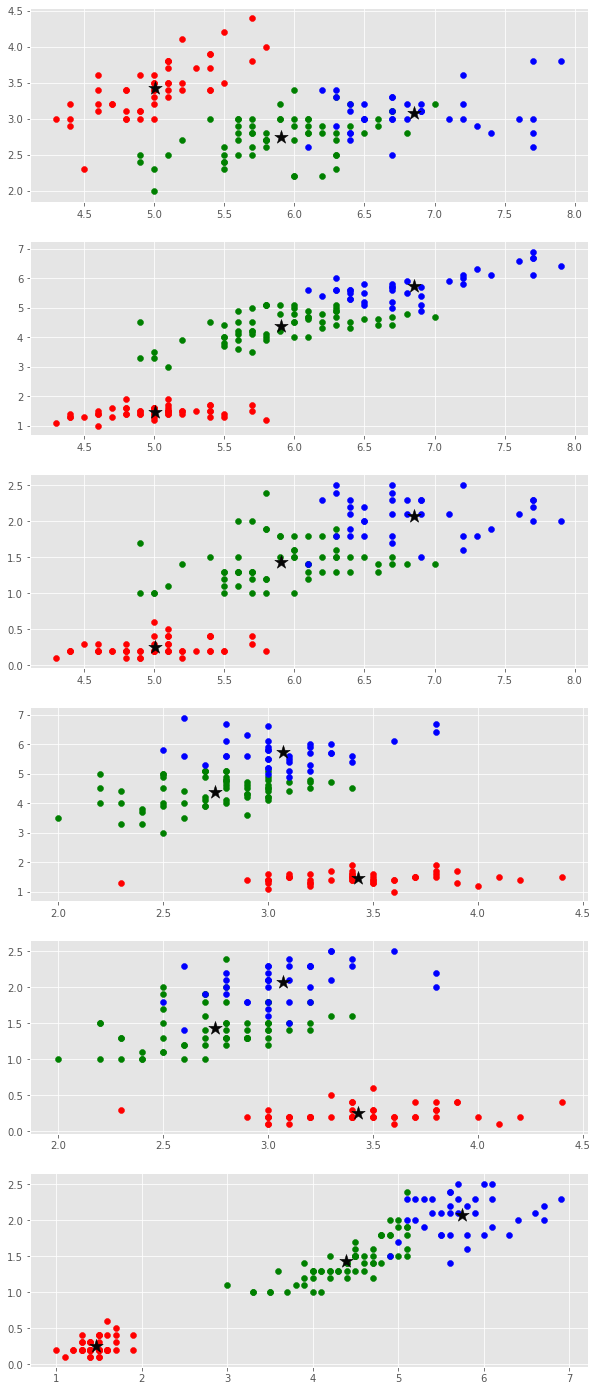

In [8]:
plt.figure(figsize=(10, 25))
colors = ['r', 'g', 'b', 'y', 'c', 'm']
count = 1
for first in range(X.shape[1]):
    for second in range(first + 1, X.shape[1]):
        plt.subplot(6, 1, count)
        for c in range(k):
            points = np.array([X[j]
                               for j in range(len(X)) if clusters[j] == c])
            plt.scatter(points[:, first], points[:, second], color=colors[c])
            plt.scatter(centroids[c, first], centroids[c,
                                                       second], marker='*', s=200, c='#050505')
        count += 1
plt.show()

Let's see the results for when we drop each feature:

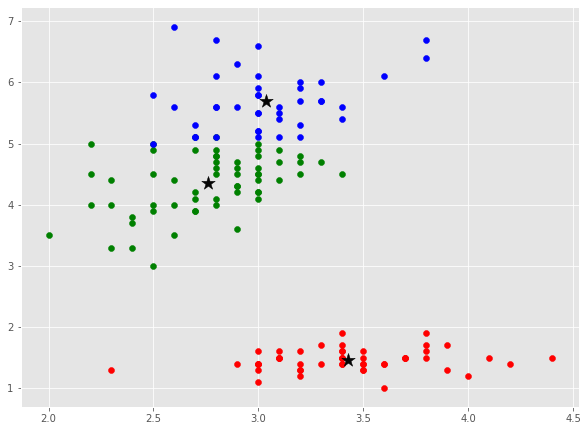

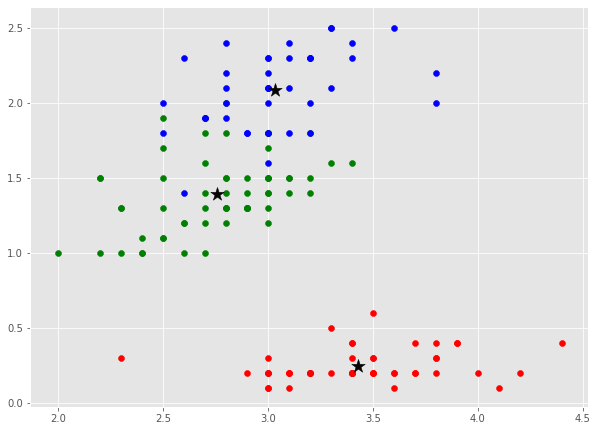

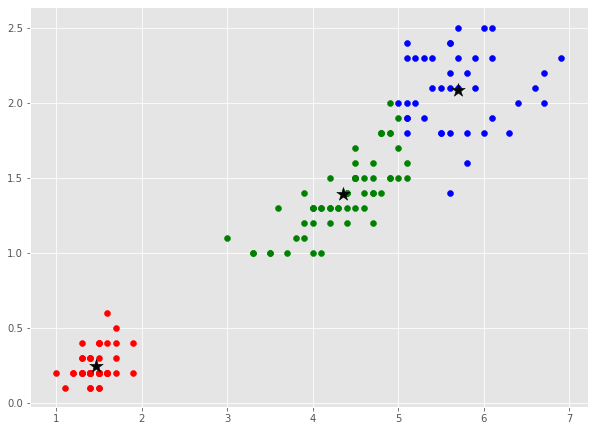

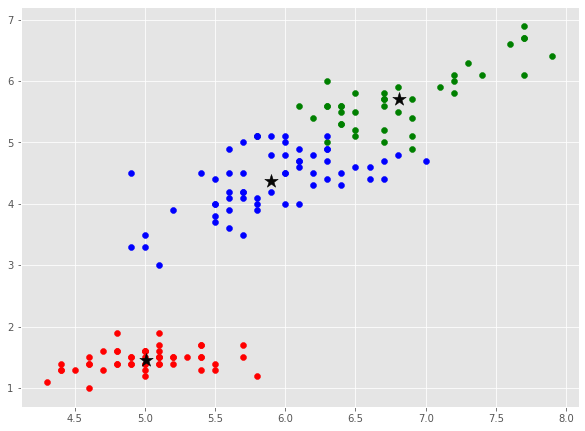

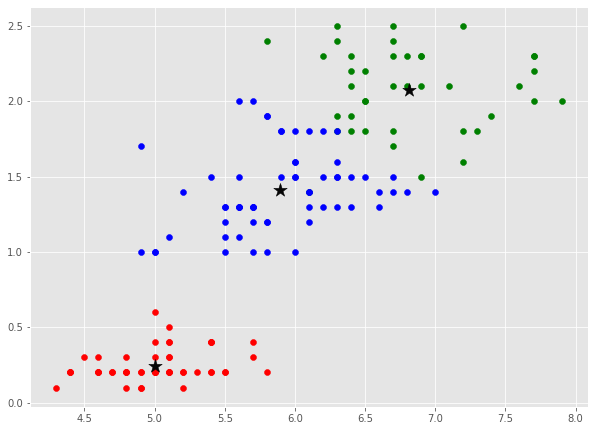

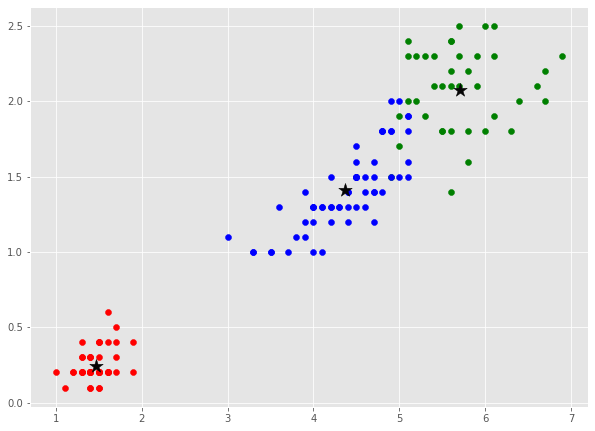

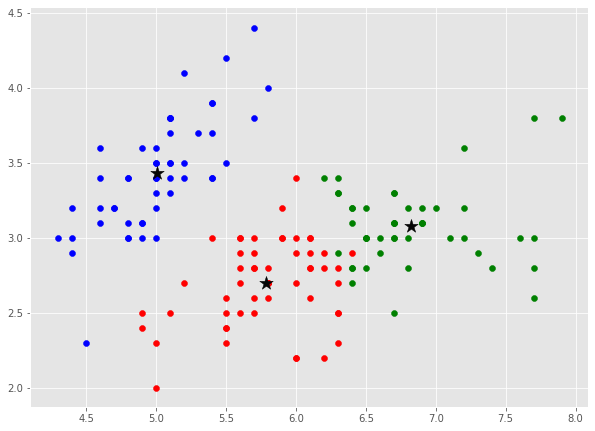

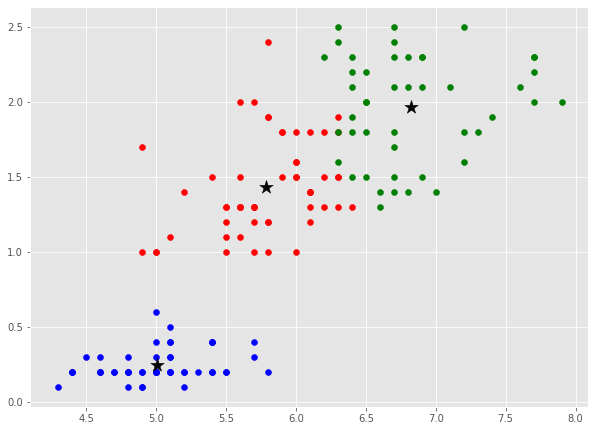

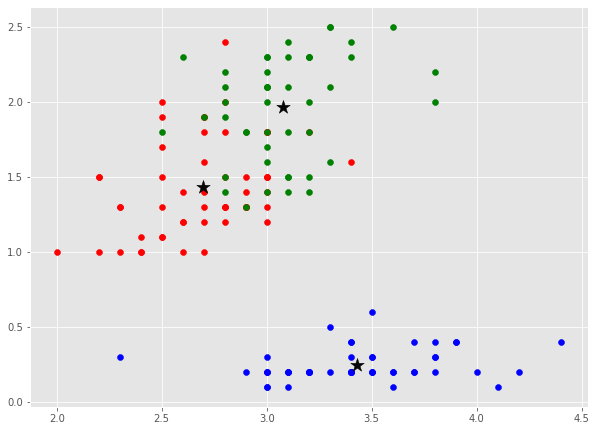

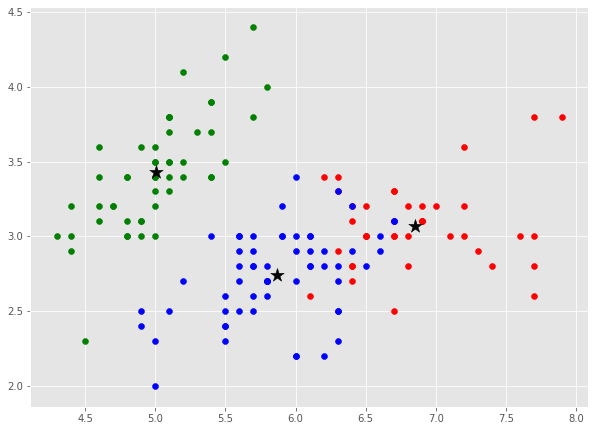

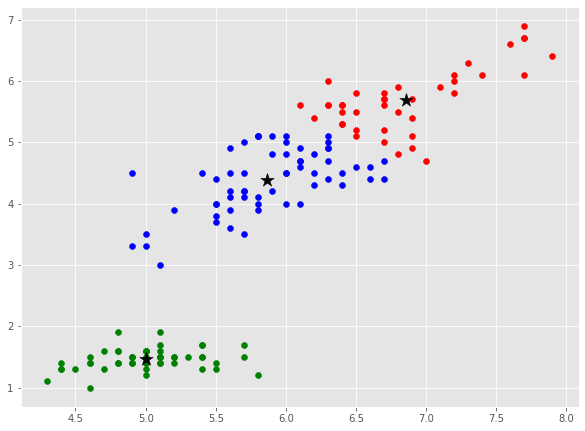

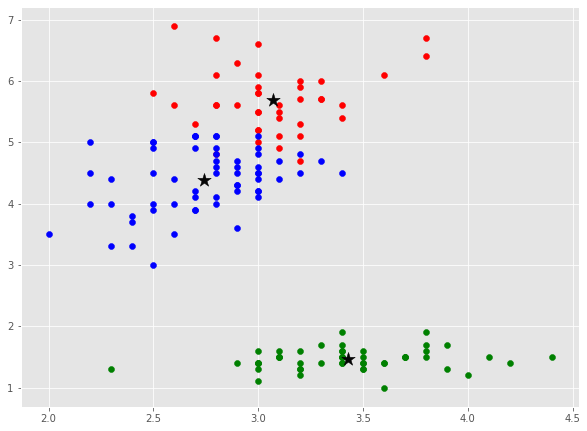

In [9]:
for feature in range(X.shape[1]):
    X_temp = np.delete(X, feature, axis=1)
    centroids, clusters, _ = k_means(X_temp, k)
    count = 1
    for first in range(X_temp.shape[1]):
        for second in range(first + 1, X_temp.shape[1]):
            plt.figure(figsize=(10, 25))
            plt.subplot(3, 1, count)
            for c in range(k):
                points = np.array(
                    [X_temp[j] for j in range(len(X_temp)) if clusters[j] == c])
                plt.scatter(points[:, first],
                            points[:, second], color=colors[c])
                plt.scatter(centroids[c, first], centroids[c,
                                                           second], marker='*', s=200, c='#050505')
            plt.show()
            count += 1

# Moving Centroids 

We are going to visualize the update in centroids in each iteration: 

In [10]:
df = pd.read_csv('iris.csv')
X = df.drop(['sepal.width', 'sepal.length', 'variety'], axis=1).copy().values

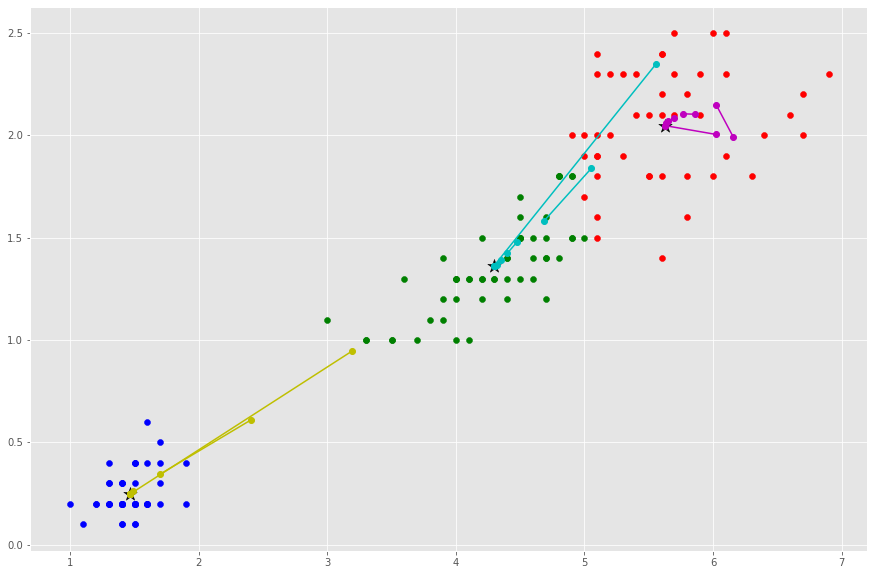

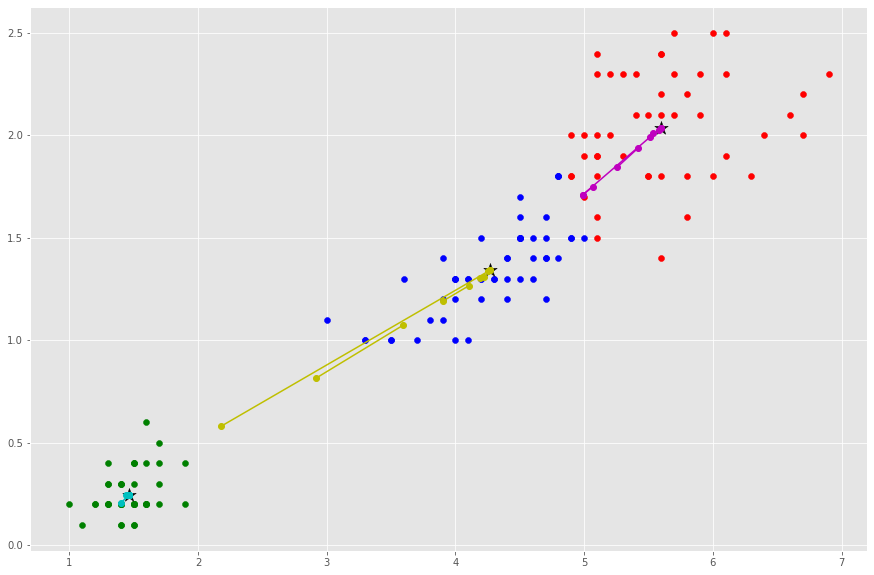

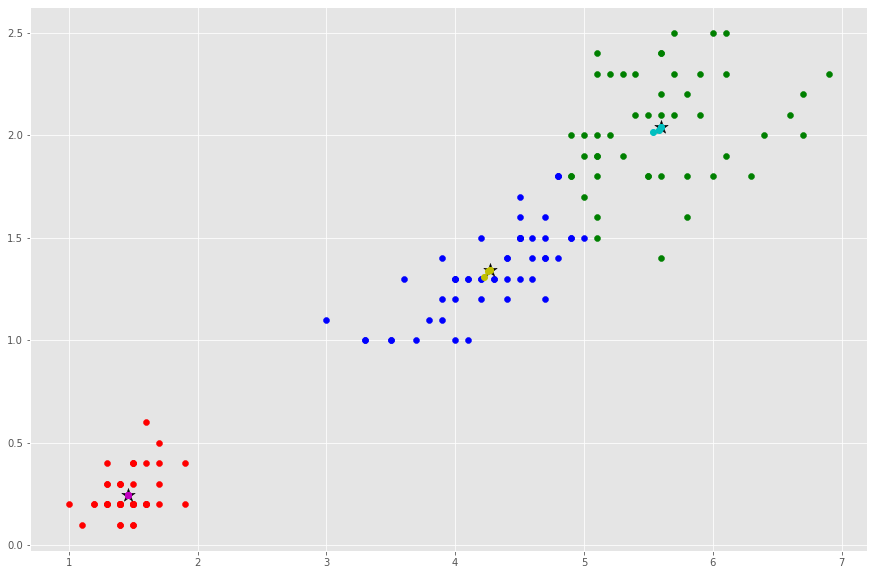

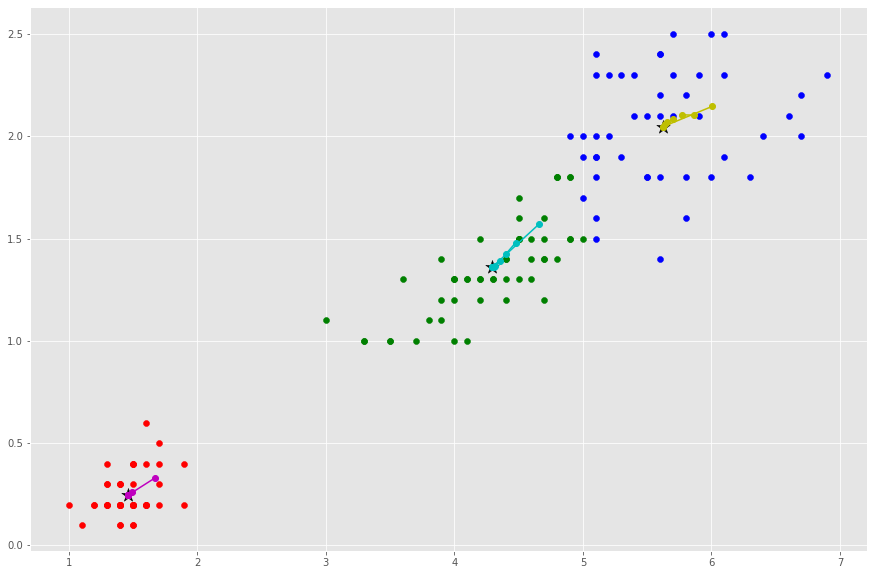

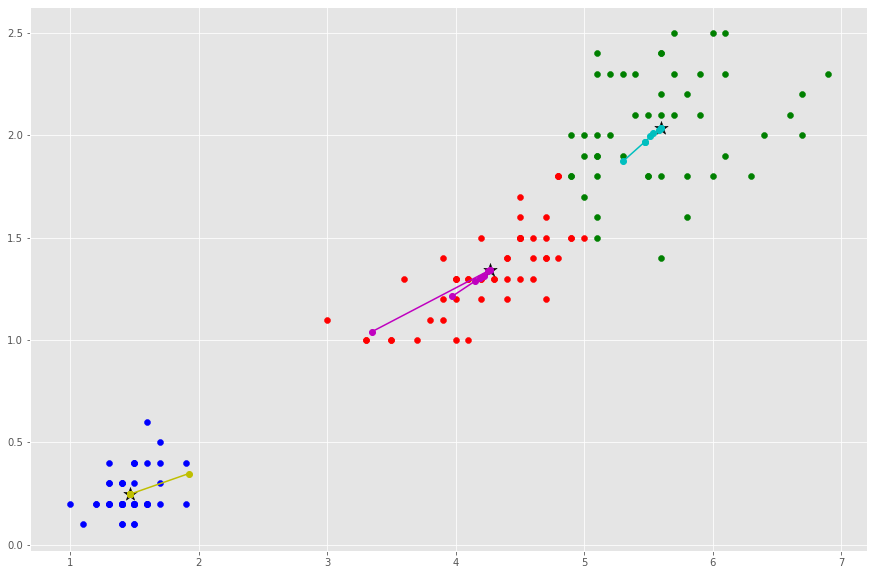

In [11]:
colors = ['r', 'g', 'b', 'y', 'c', 'm']
line_colors = ['m', 'c', 'y', 'b', 'g', 'r']
for _ in range(5):
    plt.figure(figsize=(15, 10))
    centroids, clusters, history = k_means(X, k)
    for c in range(k):
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == c])
        plt.scatter(points[:, 0], points[:, 1], color=colors[c])
        plt.scatter(centroids[c, 0], centroids[c, 1],
                    marker='*', s=200, c='#050505')
    for i in range(0, len(history) - 1, 2):
        for j in range(0, len(history[0])):
            plt.plot(history[i:i+2, j, 0], history[i:i+2, j, 1],
                     'ro-', color=line_colors[j])
    plt.show()